In [13]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


In [2]:
def load_history(path):
    with open(path, "rb") as f:
        return pickle.load(f)

In [4]:
hist_cnn_baseline = load_history("history_cnn_baseline.pkl")
hist_cnn_tuned = load_history("history_cnn_og.pkl")
hist_cnn_aug = load_history("history_cnn_augmentation2.pkl")
hist_resnet = load_history("history_cnn_resnet.pkl")
hist_transfer_cnn = load_history("history_transfer_cnn.pkl")


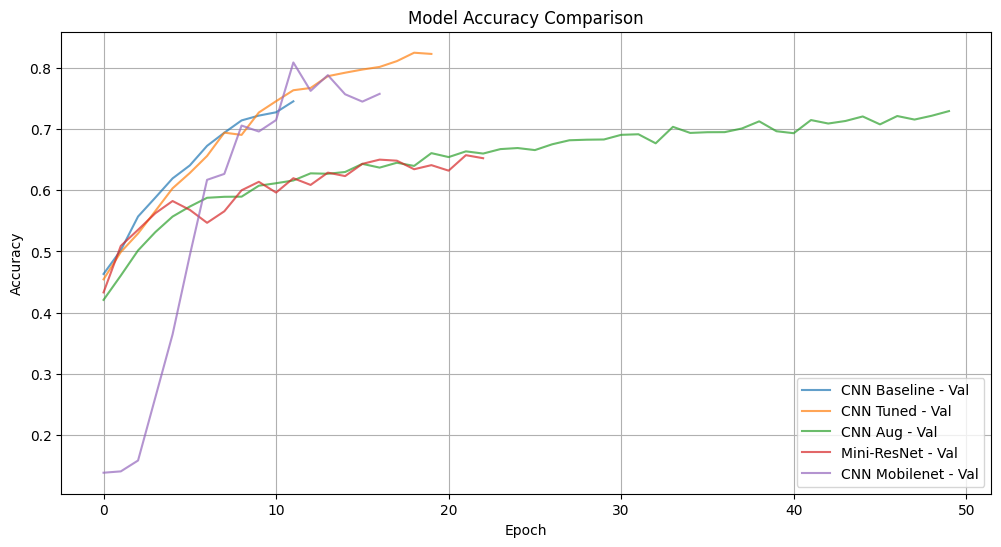

In [6]:
plt.figure(figsize=(12,6))

#plt.plot(hist_cnn_baseline['accuracy'], label="CNN Baseline - Train", alpha=0.7)
plt.plot(hist_cnn_baseline['val_accuracy'], label="CNN Baseline - Val", alpha=0.7)

#plt.plot(hist_cnn_tuned['accuracy'], label="CNN Tuned - Train", alpha=0.7)
plt.plot(hist_cnn_tuned['val_accuracy'], label="CNN Tuned - Val", alpha=0.7)

#plt.plot(hist_cnn_aug['accuracy'], label="CNN Aug - Train", alpha=0.7)
plt.plot(hist_cnn_aug['val_accuracy'], label="CNN Aug - Val", alpha=0.7)

#plt.plot(hist_resnet['accuracy'], label="Mini-ResNet - Train", alpha=0.7)
plt.plot(hist_resnet['val_accuracy'], label="Mini-ResNet - Val", alpha=0.7)

#plt.plot(hist_transfer_cnn['accuracy'], label="CNN Mobilenet - Train", alpha=0.7)
plt.plot(hist_transfer_cnn['val_accuracy'], label="CNN Mobilenet - Val", alpha=0.7)

plt.title("Model Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


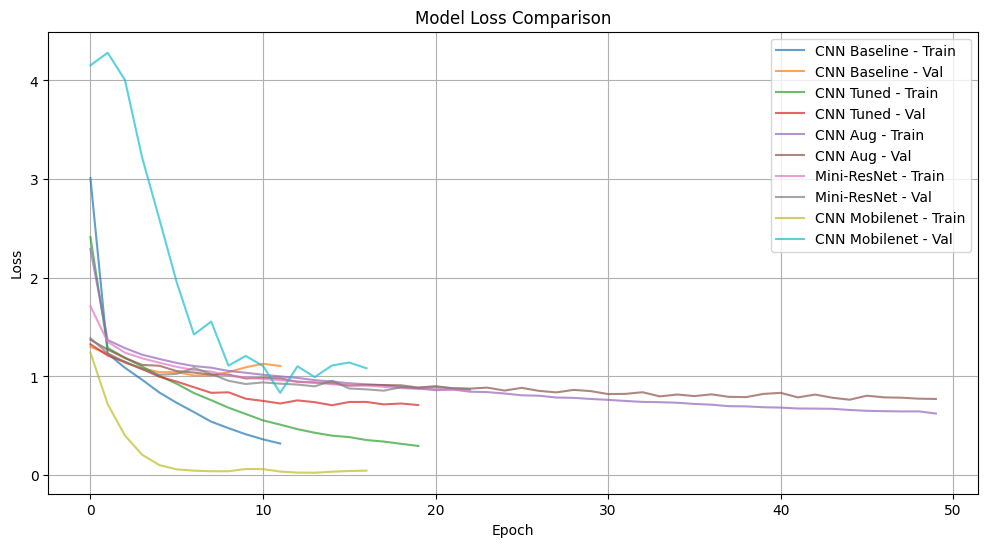

In [7]:
plt.figure(figsize=(12,6))

plt.plot(hist_cnn_baseline['loss'], label="CNN Baseline - Train", alpha=0.7)
plt.plot(hist_cnn_baseline['val_loss'], label="CNN Baseline - Val", alpha=0.7)

plt.plot(hist_cnn_tuned['loss'], label="CNN Tuned - Train", alpha=0.7)
plt.plot(hist_cnn_tuned['val_loss'], label="CNN Tuned - Val", alpha=0.7)

plt.plot(hist_cnn_aug['loss'], label="CNN Aug - Train", alpha=0.7)
plt.plot(hist_cnn_aug['val_loss'], label="CNN Aug - Val", alpha=0.7)

plt.plot(hist_resnet['loss'], label="Mini-ResNet - Train", alpha=0.7)
plt.plot(hist_resnet['val_loss'], label="Mini-ResNet - Val", alpha=0.7)

plt.plot(hist_transfer_cnn['loss'], label="CNN Mobilenet - Train", alpha=0.7)
plt.plot(hist_transfer_cnn['val_loss'], label="CNN Mobilenet - Val", alpha=0.7)

plt.title("Model Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def best_metrics(hist):
    return {
        "Best Val Accuracy": max(hist["val_accuracy"]),
        "Best Val Loss": min(hist["val_loss"])
    }

df = pd.DataFrame({
    "CNN Baseline": best_metrics(hist_cnn_baseline),
    "CNN Tuned": best_metrics(hist_cnn_tuned),
    "CNN + Aug": best_metrics(hist_cnn_aug),
    "Mini-ResNet": best_metrics(hist_resnet),
    "MobileNet": best_metrics(hist_transfer_cnn)
    
}).T

print(df)


              Best Val Accuracy  Best Val Loss
CNN Baseline           0.745238       1.010777
CNN Tuned              0.824657       0.708539
CNN + Aug              0.729309       0.764629
Mini-ResNet            0.657278       0.856322
MobileNet              0.808727       0.834004


In [14]:
def plot_cm(model, test_ds, labels):
    y_true, y_pred = [], []

    for x, y in test_ds:
        preds = model.predict(x)
        preds = np.argmax(preds, axis=1)
        y_true.extend(y.numpy())
        y_pred.extend(preds)

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()